In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Project folder in Drive
project_dir = "/content/drive/MyDrive/Heart_Disease_Project"

# Go to notebooks folder
os.chdir(os.path.join(project_dir, "notebooks"))
os.listdir()  # Check current files

['02_pca_analysis.ipynb',
 '03_feature_selection.ipynb',
 '01_data_preprocessing.ipynb']

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(os.path.join(project_dir, "data", "heart_disease_selected.csv"))
print("✅ Cleaned data loaded successfully!")
df.head()

✅ Cleaned data loaded successfully!


,cp_4.0,age,exang,cp_3.0,thalach,thal_7.0,chol,ca,trestbps,oldpeak,target
0,0,0.936181,0.0,0,0.017494,0,-0.276443,0.0,0.750380,1.068965,0
1,1,1.378929,1.0,0,-1.816334,0,0.744555,3.0,1.596266,0.381773,1
2,1,1.378929,1.0,0,-0.899420,1,-0.353500,2.0,-0.659431,1.326662,1
3,0,-1.941680,0.0,1,1.633010,0,0.051047,0.0,-0.095506,2.099753,0
4,0,-1.498933,0.0,0,0.978071,0,-0.835103,0.0,-0.095506,0.295874,0


In [7]:
from sklearn.model_selection import train_test_split


X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Train models

Logistic Regression

In [10]:
log_reg = LogisticRegression(
    C=1.0,
    solver='liblinear',
    penalty='l2',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

Decision Tree

In [11]:
dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

Random Forest

In [12]:
rforest = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)

Support Vector Machine (SVM)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        class_weight='balanced',
        probability=True,
        random_state=42
    ))
])
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

#Evaluation

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Logistic Regression Evaluation

Logistic Regression Evaluation:
Accuracy : 0.8833
Precision: 0.8889
Recall   : 0.8571
F1-score : 0.8727
AUC Score: 0.9397


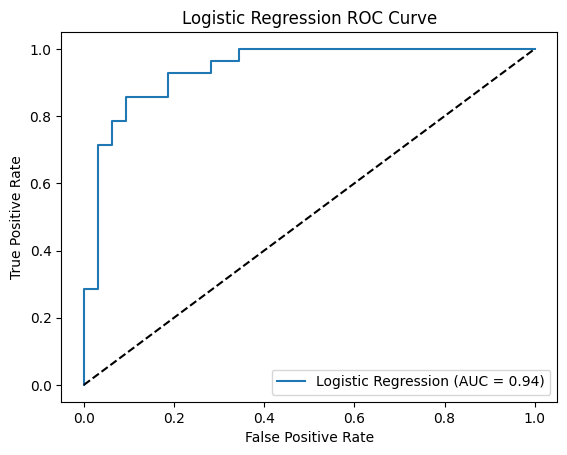

In [17]:

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Evaluation:")
print(f"Accuracy : {acc_lr:.4f}")
print(f"Precision: {prec_lr:.4f}")
print(f"Recall   : {rec_lr:.4f}")
print(f"F1-score : {f1_lr:.4f}")
print(f"AUC Score: {auc_lr:.4f}")

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()


Decision Tree Evaluation

Decision Tree Evaluation:
Accuracy : 0.6667
Precision: 0.6818
Recall   : 0.5357
F1-score : 0.6000
AUC Score: 0.6685


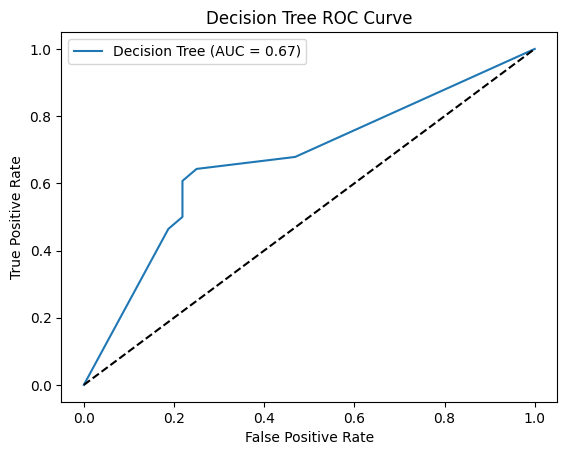

In [18]:
y_pred_dt = dtree.predict(X_test)
y_prob_dt = dtree.predict_proba(X_test)[:,1]

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

print("Decision Tree Evaluation:")
print(f"Accuracy : {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall   : {rec_dt:.4f}")
print(f"F1-score : {f1_dt:.4f}")
print(f"AUC Score: {auc_dt:.4f}")

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()


 Random Forest Evaluation

Random Forest Evaluation:
Accuracy : 0.8333
Precision: 0.8750
Recall   : 0.7500
F1-score : 0.8077
AUC Score: 0.9319


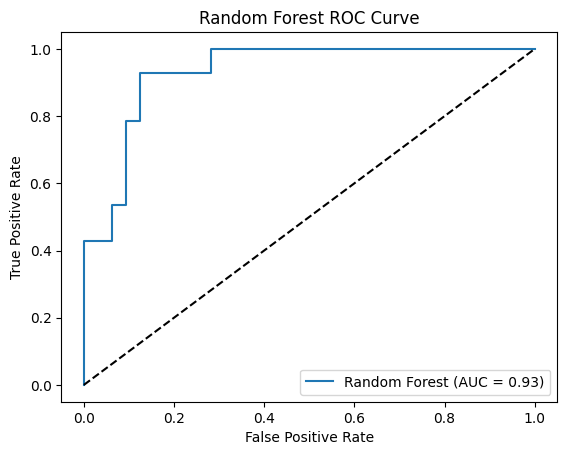

In [19]:
y_pred_rf = rforest.predict(X_test)
y_prob_rf = rforest.predict_proba(X_test)[:,1]

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Evaluation:")
print(f"Accuracy : {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall   : {rec_rf:.4f}")
print(f"F1-score : {f1_rf:.4f}")
print(f"AUC Score: {auc_rf:.4f}")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()


SVM Evaluation

SVM Evaluation:
Accuracy : 0.8333
Precision: 0.8462
Recall   : 0.7857
F1-score : 0.8148
AUC Score: 0.9431


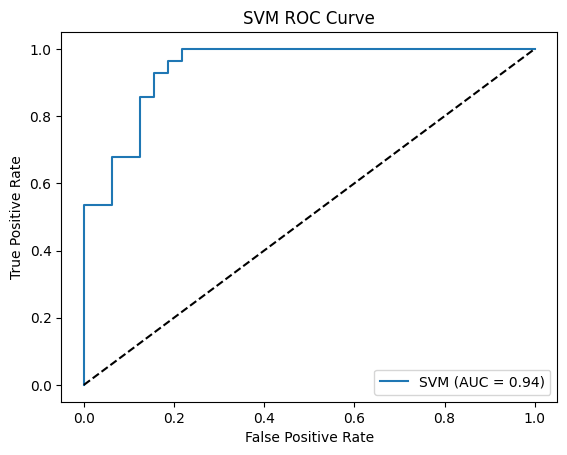

In [20]:
y_pred_svm = svm_pipeline.predict(X_test)
y_prob_svm = svm_pipeline.predict_proba(X_test)[:,1]

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print("SVM Evaluation:")
print(f"Accuracy : {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f}")
print(f"Recall   : {rec_svm:.4f}")
print(f"F1-score : {f1_svm:.4f}")
print(f"AUC Score: {auc_svm:.4f}")

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()


#Overall Evaluation

In [21]:

summary_dict = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [acc_lr, acc_dt, acc_rf, acc_svm],
    'Precision': [prec_lr, prec_dt, prec_rf, prec_svm],
    'Recall': [rec_lr, rec_dt, rec_rf, rec_svm],
    'F1-score': [f1_lr, f1_dt, f1_rf, f1_svm],
    'AUC': [auc_lr, auc_dt, auc_rf, auc_svm]
}

summary_df = pd.DataFrame(summary_dict)

summary_df[['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']] = summary_df[['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']].round(4)

print("Summary of Model Evaluation Metrics:")
display(summary_df)


Summary of Model Evaluation Metrics:


,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.8833,0.8889,0.8571,0.8727,0.9397
1,Decision Tree,0.6667,0.6818,0.5357,0.6000,0.6685
2,Random Forest,0.8333,0.8750,0.7500,0.8077,0.9319
3,SVM,0.8333,0.8462,0.7857,0.8148,0.9431


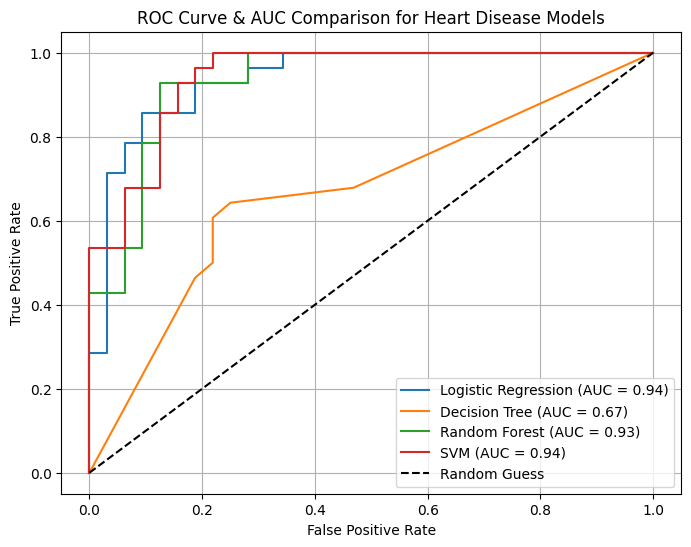

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8,6))

y_score_lr = log_reg.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
auc_lr = roc_auc_score(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

y_score_dt = dtree.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
auc_dt = roc_auc_score(y_test, y_score_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

y_score_rf = rforest.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
auc_rf = roc_auc_score(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

y_score_svm = svm_pipeline.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve & AUC Comparison for Heart Disease Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [25]:
!mv "/content/drive/MyDrive/Colab Notebooks/04_supervised_learning.ipynb" "/content/drive/MyDrive/Heart_Disease_Project/notebooks/04_supervised_learning.ipynb"
